In [104]:
import pandas as pd
from glob import glob
import numpy as np
import xml.etree.ElementTree as ET
import os
from typing import List,Union,Final

#### Q1 How much flow each retail brokers have

In [105]:
COLS : Final[str] = ["DataDate","category","venue",
 'orderPct',
 'marketPct',
 'marketableLimitPct',
 'nonMarketableLimitPct',
 'otherPct',
 'netPmtPaidRecvMarketOrdersUsd',
 'netPmtPaidRecvMarketOrdersCph',
 'netPmtPaidRecvMarketableLimitOrdersUsd',
 'netPmtPaidRecvMarketableLimitOrdersCph',
 'netPmtPaidRecvNonMarketableLimitOrdersUsd',
 'netPmtPaidRecvNonMarketableLimitOrdersCph',
 'netPmtPaidRecvOtherOrdersUsd',
 'netPmtPaidRecvOtherOrdersCph']
def readXMLToList(root,datarows:List[List[Union[int,float,str]]]) -> None:
    for monthly in root.findall("rMonthly"):
        for venue in monthly.find("rSP500/rVenues"):
            this_row= []
            this_row.append(int(monthly.find("year").text+monthly.find('mon').text))
            this_row.append("SP500")
            for field in venue:
                if field.tag in {"materialAspects","mic"}:
                    pass
                elif field.tag=="name":
                    this_row.append(field.text)
                else:
                    this_row.append(float(field.text))
            datarows.append(this_row)
        for venue in monthly.find("rOtherStocks/rVenues"):
            this_row= []
            this_row.append(int(monthly.find("year").text+monthly.find('mon').text))
            this_row.append("OtherStocks")
            for field in venue:
                if field.tag in {"materialAspects","mic"}:
                    pass
                elif field.tag=="name":
                    this_row.append(field.text)
                else:
                    this_row.append(float(field.text))
            datarows.append(this_row)
        for venue in monthly.find("rOptions/rVenues"):
            this_row= []
            this_row.append(int(monthly.find("year").text+monthly.find('mon').text))
            this_row.append("Options")
            for field in venue:
                if field.tag in {"materialAspects","mic"}:
                    pass
                elif field.tag=="name":
                    this_row.append(field.text)
                else:
                    this_row.append(float(field.text))
            datarows.append(this_row)
def readByBroker(broker:str,report_path:str,):
    broker_report_path = os.path.join(report_path,broker)
    broker_606_paths = glob(os.path.join(broker_report_path,"*"))
    datarows = []
    for path in broker_606_paths:
        tree = ET.parse(path)
        root = tree.getroot()
        readXMLToList(root,datarows)
    res = pd.DataFrame(data=datarows,columns=COLS)
    res.insert(0,"broker",broker)
    return res

In [106]:
retail_brokers = ["Ameritrade","Chas","Etrade","Fidelity"]
report_path = os.path.abspath(os.path.join(".","downloaded_reports"))

In [107]:
reports606_list = []
for broker in retail_brokers:
    print(broker)
    reports606_list.append(readByBroker(broker,report_path))

Ameritrade
Chas
Etrade
Fidelity


In [108]:
report606 = pd.concat(reports606_list,axis=0)

In [109]:
report606.sort_values(["category","broker","DataDate","venue"],inplace=True)
report606.reset_index(inplace=True,drop=True)

In [110]:
report606.groupby("broker").head(1)

,broker,DataDate,category,venue,orderPct,marketPct,marketableLimitPct,nonMarketableLimitPct,otherPct,netPmtPaidRecvMarketOrdersUsd,netPmtPaidRecvMarketOrdersCph,netPmtPaidRecvMarketableLimitOrdersUsd,netPmtPaidRecvMarketableLimitOrdersCph,netPmtPaidRecvNonMarketableLimitOrdersUsd,netPmtPaidRecvNonMarketableLimitOrdersCph,netPmtPaidRecvOtherOrdersUsd,netPmtPaidRecvOtherOrdersCph
0,Ameritrade,202004,Options,"Citadel Securities, LLC",40.37,36.22,36.63,43.36,39.09,730717.00,53.6500,3309735.00,56.8000,4961354.00,57.8300,1875107.00,41.7500
177,Chas,202004,Options,Citadel Execution Services,34.16,32.68,33.03,32.57,39.04,820650.60,33.9975,734178.50,35.0309,1172740.40,35.9432,524768.50,30.9516
368,Etrade,202010,Options,Citadel Execution Services,38.12,39.27,38.62,38.96,36.26,2256000.26,45.8166,1899691.92,47.3254,2092455.44,46.9622,1338810.08,43.5665
552,Fidelity,202001,Options,Citadel Securities LLC,39.70,28.93,29.65,42.58,52.16,558669.00,27.4700,166312.00,27.4700,872899.00,27.4700,263795.00,14.3523


In [111]:
report606.columns

Index(['broker', 'DataDate', 'category', 'venue', 'orderPct', 'marketPct',
       'marketableLimitPct', 'nonMarketableLimitPct', 'otherPct',
       'netPmtPaidRecvMarketOrdersUsd', 'netPmtPaidRecvMarketOrdersCph',
       'netPmtPaidRecvMarketableLimitOrdersUsd',
       'netPmtPaidRecvMarketableLimitOrdersCph',
       'netPmtPaidRecvNonMarketableLimitOrdersUsd',
       'netPmtPaidRecvNonMarketableLimitOrdersCph',
       'netPmtPaidRecvOtherOrdersUsd', 'netPmtPaidRecvOtherOrdersCph'],
      dtype='object')

In [112]:
report606 = report606[report606.DataDate>=202101]
report606.reset_index(inplace=True,drop=True)

In [113]:
monthly_usd_flow = report606.groupby(["broker","DataDate"])[['netPmtPaidRecvMarketOrdersUsd','netPmtPaidRecvMarketableLimitOrdersUsd','netPmtPaidRecvNonMarketableLimitOrdersUsd','netPmtPaidRecvOtherOrdersUsd']].sum()

In [114]:
usd_flow = report606.groupby(["category","broker"])[['netPmtPaidRecvMarketOrdersUsd','netPmtPaidRecvMarketableLimitOrdersUsd','netPmtPaidRecvNonMarketableLimitOrdersUsd','netPmtPaidRecvOtherOrdersUsd']].sum()

In [115]:
usd_flow["usdSum"] = usd_flow.sum(axis=1)

In [116]:
usd_flow

netPmtPaidRecvMarketOrdersUsd  \
category    broker                                      
Options     Ameritrade                   8.128925e+07   
            Chas                         1.351927e+08   
            Etrade                       1.892848e+08   
            Fidelity                     3.698849e+07   
OtherStocks Ameritrade                   5.987950e+07   
            Chas                         9.149248e+07   
            Etrade                       1.340704e+08   
            Fidelity                    -3.197600e+04   
SP500       Ameritrade                   1.268428e+07   
            Chas                         2.556404e+07   
            Etrade                       2.803602e+07   
            Fidelity                    -1.074700e+04   

                        netPmtPaidRecvMarketableLimitOrdersUsd  \
category    broker                                               
Options     Ameritrade                            3.237880e+08   
            Chas                                  1.146639e+08   
            Etrade                                1.562517e+08   
            Fidelity                              2.977143e+07   
OtherStocks Ameritrade                            6.058657e+07   
            Chas                                  2.989516e+07   
            Etrade                                6.165957e+07   
            Fidelity                             -1.422130e+05   
SP500       Ameritrade                            6.186426e+06   
            Chas                                  4.463287e+06   
            Etrade                                5.683118e+06   
            Fidelity                             -2.566200e+04   

                        netPmtPaidRecvNonMarketableLimitOrdersUsd  \
category    broker                                                  
Options     Ameritrade                               2.907176e+08   
            Chas                                     1.616441e+08   
            Etrade                                   1.712239e+08   
            Fidelity                                 1.473838e+08   
OtherStocks Ameritrade                               7.641021e+07   
            Chas                                     8.238255e+07   
            Etrade                                   6.665612e+07   
            Fidelity                                 7.468984e+07   
SP500       Ameritrade                               1.791310e+07   
            Chas                                     2.122931e+07   
            Etrade                                   1.284473e+07   
            Fidelity                                 1.740336e+07   

                        netPmtPaidRecvOtherOrdersUsd        usdSum  
category    broker                                                  
Options     Ameritrade                  1.784988e+08  8.742936e+08  
            Chas                        1.017437e+08  5.132445e+08  
            Etrade                      1.511212e+08  6.678816e+08  
            Fidelity                    3.454680e+07  2.486905e+08  
OtherStocks Ameritrade                  1.818636e+07  2.150626e+08  
            Chas                        1.249772e+07  2.162679e+08  
            Etrade                      2.221758e+07  2.846037e+08  
            Fidelity                   -2.881900e+04  7.448683e+07  
SP500       Ameritrade                  2.353472e+06  3.913727e+07  
            Chas                        3.818600e+06  5.507524e+07  
            Etrade                      6.554766e+06  5.311863e+07  
            Fidelity                   -1.371200e+04  1.735324e+07

In [117]:
tmpA = report606[["netPmtPaidRecvMarketOrdersCph",'netPmtPaidRecvMarketableLimitOrdersCph','netPmtPaidRecvNonMarketableLimitOrdersCph','netPmtPaidRecvOtherOrdersCph']].to_numpy()

In [118]:
tmpB = report606[['marketPct','marketableLimitPct', 'nonMarketableLimitPct', 'otherPct']].to_numpy()

In [119]:
report606[["MarketOrdersCph",'MarketableLimitOrdersCph','NonMarketableLimitOrdersCph','OtherOrdersCph']] = tmpA*tmpB
report606[["MarketOrdersCph",'MarketableLimitOrdersCph','NonMarketableLimitOrdersCph','OtherOrdersCph']] = report606.groupby(["broker","DataDate","category"])[["MarketOrdersCph",'MarketableLimitOrdersCph','NonMarketableLimitOrdersCph','OtherOrdersCph']].transform("sum")/100

In [120]:
Cph_flow_mean = report606.groupby(["category","broker"])[["MarketOrdersCph",'MarketableLimitOrdersCph','NonMarketableLimitOrdersCph','OtherOrdersCph']].mean()

In [121]:
Cph_flow_mean

MarketOrdersCph  MarketableLimitOrdersCph  \
category    broker                                                  
Options     Ameritrade        49.336869                 62.443043   
            Chas              53.439592                 54.222308   
            Etrade            46.123808                 46.324924   
            Fidelity          10.249228                 12.445190   
OtherStocks Ameritrade         9.820313                  9.648559   
            Chas               9.606346                  9.288733   
            Etrade            17.521777                 10.410303   
            Fidelity          -0.002683                 -0.273191   
SP500       Ameritrade         9.994422                  9.994108   
            Chas               9.716730                  9.573645   
            Etrade            19.884293                 18.816069   
            Fidelity          -0.001202                 -0.500677   

                        NonMarketableLimitOrdersCph  OtherOrdersCph  
category    broker                                                   
Options     Ameritrade                    54.218330       37.346005  
            Chas                          52.800062       36.317202  
            Etrade                        45.475222       39.366475  
            Fidelity                      42.307167       17.063959  
OtherStocks Ameritrade                    27.494298        7.738013  
            Chas                          27.517229        8.220717  
            Etrade                        21.177984       11.629815  
            Fidelity                      14.393276       -0.016518  
SP500       Ameritrade                    33.684511        8.845383  
            Chas                          31.260885       10.371896  
            Etrade                        28.953321       16.850117  
            Fidelity                      18.800297       -0.001610

### Q2 How market share of each broker was changing during the time we have data from? (Would be good to have both tables and plots).
Since some of the retail brokers don't get payment flow for market makers (Such as Fidelity), so we need to deal with this problem carefully.

In [122]:
colsUSDPayment = ['netPmtPaidRecvMarketOrdersUsd','netPmtPaidRecvMarketableLimitOrdersUsd','netPmtPaidRecvNonMarketableLimitOrdersUsd','netPmtPaidRecvOtherOrdersUsd']
colsUSDPaymentPerShare = ["netPmtPaidRecvMarketOrdersCph",'netPmtPaidRecvMarketableLimitOrdersCph','netPmtPaidRecvNonMarketableLimitOrdersCph','netPmtPaidRecvOtherOrdersCph']
totalPayment = report606[colsUSDPayment].to_numpy()
PaymentPerShare = report606[colsUSDPaymentPerShare].to_numpy()

In [123]:
#report606["TotalShares"] = np.nansum(totalPayment/PaymentPerShare,axis=1)

In [124]:
for j in range(4):
    print(report606.columns[5+j],report606.columns[9+2*j],report606.columns[10+2*j])

marketPct netPmtPaidRecvMarketOrdersUsd netPmtPaidRecvMarketOrdersCph
marketableLimitPct netPmtPaidRecvMarketableLimitOrdersUsd netPmtPaidRecvMarketableLimitOrdersCph
nonMarketableLimitPct netPmtPaidRecvNonMarketableLimitOrdersUsd netPmtPaidRecvNonMarketableLimitOrdersCph
otherPct netPmtPaidRecvOtherOrdersUsd netPmtPaidRecvOtherOrdersCph


In [125]:
updated_group_list = []
for label, group in report606.groupby(["category","broker","DataDate"]):
    n = len(group)
    totalShares = 0
    for i in range(n):
        for j in range(4):
            if group.iloc[i,9+2*j] != 0 and group.iloc[i,5+j]>20:
                #print(label,group.iloc[i,9+2*j],group.iloc[i,10+2*j],group.iloc[i,5+j])
                totalShares=group.iloc[i,9+2*j]/group.iloc[i,10+2*j]/group.iloc[i,5+j]*100
                break
        if totalShares!=0:
            break
    group["TotalShares"] = totalShares
    print(label,totalShares)
    updated_group_list.append(group)

('Options', 'Ameritrade', 202101) 63153.097962467305
('Options', 'Ameritrade', 202102) 62977.44730848026
('Options', 'Ameritrade', 202103) 74669.17555614079
('Options', 'Ameritrade', 202104) 62341.693698475174
('Options', 'Ameritrade', 202105) 60401.03313408605
('Options', 'Ameritrade', 202106) 64647.67818653088
('Options', 'Ameritrade', 202107) 64034.35669387632
('Options', 'Ameritrade', 202108) 58815.75354225513
('Options', 'Ameritrade', 202109) 61015.55141406957
('Options', 'Ameritrade', 202110) 63726.44131451422
('Options', 'Ameritrade', 202111) 64834.9098270603
('Options', 'Ameritrade', 202112) 62427.017808924495
('Options', 'Ameritrade', 202201) 62185.84269487882
('Options', 'Ameritrade', 202202) 53099.26592973336
('Options', 'Ameritrade', 202203) 51505.76043996852
('Options', 'Ameritrade', 202204) 47057.33391508632
('Options', 'Ameritrade', 202205) 54460.387620432426
('Options', 'Ameritrade', 202206) 40264.21848966543
('Options', 'Ameritrade', 202207) 39409.75946905279
('Options

In [126]:
report606 = pd.concat(updated_group_list,axis=0)

In [127]:
report606.loc[(report606.DataDate==202108) & (report606.broker=="Fidelity") & (report606.category=="SP500"),"TotalShares"] = report606.loc[(report606.DataDate==202108) & (report606.broker=="Fidelity") & (report606.category=="SP500"),"TotalShares"]*0.1

In [128]:
TotalShares = report606.groupby(["category","broker","DataDate"]).head(1)[["category","broker","DataDate","TotalShares"]]
TotalShares.reset_index(drop=True,inplace=True)

In [129]:
#for label,group in TotalShares.groupby(["category","DataDate"]):
TotalShares["MarketShares"] = TotalShares.groupby(["category","DataDate"])["TotalShares"].transform(lambda x: x/np.sum(x))

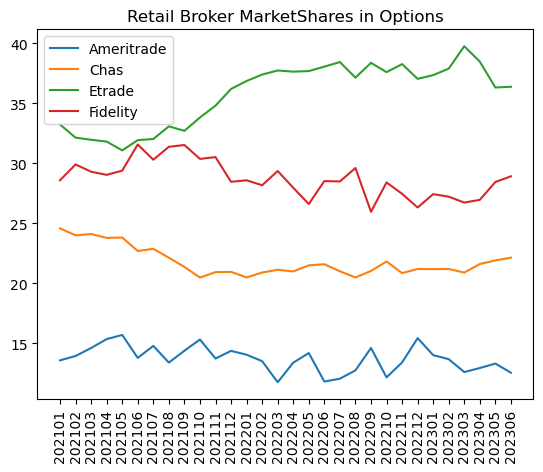

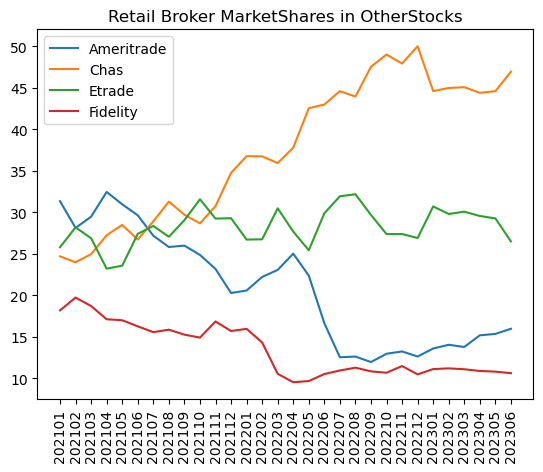

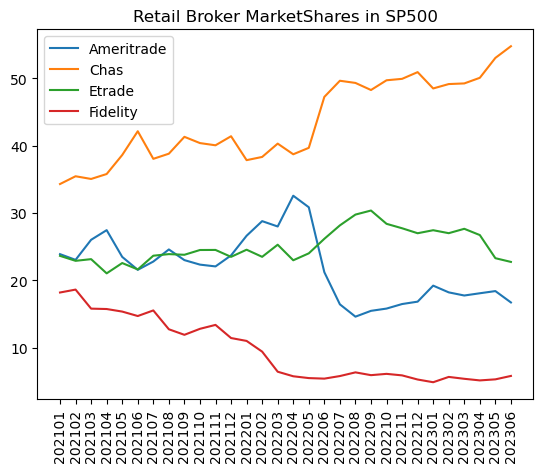

In [130]:
from matplotlib import pyplot as plt
for category, group in TotalShares.groupby(["category"]):
    for broker, subgroup in group.groupby(["broker"]):
        plt.plot(subgroup["DataDate"].astype(str),subgroup["MarketShares"]*100,label=broker[0])
    plt.xticks(rotation=90)
    plt.legend()
    plt.title("Retail Broker MarketShares in {}".format(category[0]))
    plt.show()

In [131]:
for category, group in TotalShares.groupby(["category"]):
    for broker, subgroup in group.groupby(["broker"]):
        print(subgroup)

   category      broker  DataDate   TotalShares  MarketShares
0   Options  Ameritrade    202101  63153.097962      0.135828
1   Options  Ameritrade    202102  62977.447308      0.139457
2   Options  Ameritrade    202103  74669.175556      0.146145
3   Options  Ameritrade    202104  62341.693698      0.153537
4   Options  Ameritrade    202105  60401.033134      0.157022
5   Options  Ameritrade    202106  64647.678187      0.137885
6   Options  Ameritrade    202107  64034.356694      0.147890
7   Options  Ameritrade    202108  58815.753542      0.133960
8   Options  Ameritrade    202109  61015.551414      0.143860
9   Options  Ameritrade    202110  63726.441315      0.153212
10  Options  Ameritrade    202111  64834.909827      0.137362
11  Options  Ameritrade    202112  62427.017809      0.143750
12  Options  Ameritrade    202201  62185.842695      0.140538
13  Options  Ameritrade    202202  53099.265930      0.135155
14  Options  Ameritrade    202203  51505.760440      0.117608
15  Opti

### Q3 Combing with report 605, what percentage of their incoming flow come from brokers we are analyzing?

In [132]:
market_makers = ["citadelSec","Virtu"]
report_605_list = []
for market_maker in market_makers:
    report605_paths = glob(os.path.join(report_path,market_maker,"*"))
    for report605_path in report605_paths:
        report_605_list.append(pd.read_csv(report605_path,sep='|',header=None))

In [133]:
report605 = pd.concat(report_605_list,axis=0)

In [134]:
# F1: Designated Participant Code	F10: Market Center Executed Shares	F19: Price-Improved Shares
# F2: Market Center Code	F11: Away Executed Shares	F20: Price Improved Average Amount ($)
# F3: Date	F12: Shares from 0 to 9 Seconds	F21: Price Improved Average Time (seconds)
# F4: Security Ticker Symbol	F13: Shares from 10 to 29 Seconds	F22: At-the Quote Shares
# F5: Order Type Code	F14: Shares from 30 to 59 Seconds	F23: At-the-Quote Average Time (seconds)
# F6: Order Size Code	F15: Shares from 60 to 299 Seconds	F24: Outside-the-Quote Shares
# F7: Total Covered Orders	F16: Shares from 5 to 30 Minutes	F25: Outside-the-Quote Average Amount ($)
# F8: Total Covered Shares	F17: Average Realized Spread ($)	F26: Outside-the-Quote Average Time (seconds)
# F9: Cancelled Shares	F18: Average Effective Spread ($)

In [135]:
report605.columns = ["DP","MC",'DataDate',"ukey","OrderType","OrderSize","TotalOrders","TotalShares","CancelledShares","MCExecutedShares","AwayExecutedShares","SharesT1","SharesT2","SharesT3","SharesT4","SharesT5","ARSpread","AESpread","PIShares","PIAAmount","PIATimes","AQShares","AQATime","OQShares","OQAAmount","OQATime"]

In [136]:
report605=report605[report605.DataDate>=202101]
report605.reset_index(drop=True,inplace=True)

In [137]:
report605.sort_values(["MC","DataDate"],inplace=True)

In [138]:
report605.reset_index(drop=True,inplace=True)

In [139]:
report605.MC.unique()

array(['NITE', 'TCDRG', 'TVIRT', 'VIRT'], dtype=object)

In [140]:
report605.loc[report605.MC=="TVIRT","MC"] = "VIRT"

In [141]:
monthlytotalSharesMarketMarket = report605.groupby(["MC","DataDate"])["TotalShares"].sum()

In [142]:
for venue in report606.venue.unique():
    if "citadel" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "citadel"
    elif "virtu" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "virtu"

In [143]:
report606["venueShares"] = report606["TotalShares"]*report606["orderPct"]/100

In [144]:
report606Stock = report606[(report606.category!="Options") & ((report606.venue == "citadel") | (report606.venue=="virtu"))]
report606Stock.reset_index(drop=True,inplace=True)

In [145]:
knownShares = report606Stock.groupby(["DataDate","venue"])["venueShares"].sum()

In [146]:
knownShares = knownShares*10000

In [147]:
monthlytotalSharesMarketMarket = pd.DataFrame(monthlytotalSharesMarketMarket)

In [148]:
monthlytotalSharesMarketMarket.index.get_level_values(0).unique()

Index(['NITE', 'TCDRG', 'VIRT'], dtype='object', name='MC')

In [149]:
monthlytotalSharesMarketMarket.reset_index(inplace=True)
monthlytotalSharesMarketMarket.loc[(monthlytotalSharesMarketMarket.MC == "NITE") | (monthlytotalSharesMarketMarket.MC == "VIRT"),"MC"] = "virtu"
monthlytotalSharesMarketMarket.loc[(monthlytotalSharesMarketMarket.MC == "TCDRG"),"MC"] = "citadel"

In [150]:
monthlytotalSharesMarketMarket.rename(columns={"MC":"venue"},inplace=True)

In [151]:
monthlytotalSharesMarketMarket = monthlytotalSharesMarketMarket.groupby(["DataDate","venue"])["TotalShares"].sum()

In [152]:
knownShares

DataDate  venue  
202101    citadel    7.488851e+09
          virtu      5.251638e+09
202102    citadel    7.453204e+09
          virtu      5.079388e+09
202103    citadel    6.715560e+09
          virtu      4.553505e+09
202104    citadel    4.209784e+09
          virtu      3.085174e+09
202105    citadel    4.024375e+09
          virtu      3.051685e+09
202106    citadel    4.823495e+09
          virtu      3.550184e+09
202107    citadel    3.798633e+09
          virtu      2.798825e+09
202108    citadel    3.508487e+09
          virtu      2.471434e+09
202109    citadel    3.755401e+09
          virtu      2.648786e+09
202110    citadel    3.770722e+09
          virtu      2.759953e+09
202111    citadel    3.791916e+09
          virtu      2.913309e+09
202112    citadel    3.383781e+09
          virtu      2.648643e+09
202201    citadel    3.308607e+09
          virtu      2.582011e+09
202202    citadel    2.959648e+09
          virtu      2.226362e+09
202203    citadel    4.002086e

In [153]:
knownRatio = (knownShares/monthlytotalSharesMarketMarket).dropna()

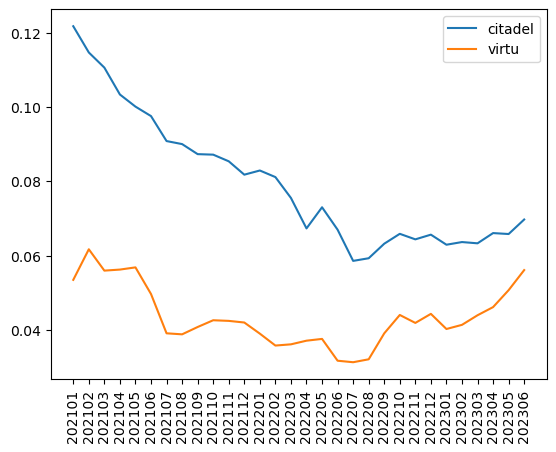

In [154]:
for venue, group in knownRatio.groupby("venue"):
    plt.plot(group.index.get_level_values(0).astype(str),group,label=venue)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Q4 How market share of each market maker was changing during the time we have data? (Again a table and a plot please).

In [155]:
report606.venue.unique()

array(['citadel', 'Dash/IMC', 'Global Execution Brokers LP',
       'Morgan Stanley & Co., LLC', 'Wolverine Execution Services',
       'Dash/IMC Financial Markets', 'DASH/IMC',
       'Wolverine Execution Services, LLC', 'Two Sigma Securities, LLC',
       'Matrix Executions, LLC / Simplex Trading, LLC',
       'Dash Financial Technologies LLC', 'Morgan Stanley & Company LLC',
       'Susquehanna Capital Group', 'Wolverine Execution Services LLC',
       'virtu', 'Cboe EDGX Exchange, Inc.', 'G1 Execution Services, LLC',
       'The Nasdaq Stock Market', 'UBS Securities, LLC', 'JANEST',
       'Members Exchange (MEMX)', 'G1X Execution Services, LLC',
       'Jane Street Capital', 'Cboe EDGX US Equities Exchange',
       'JANE STREET CAPITAL, LLC', 'NASDAQ Execution Services, LLC',
       'NYSE Arca', 'National Financial Services LLC',
       'New York Stock Exchange', 'Jane Street Capital, LLC',
       'Cboe BZX U.S. Equities Exchange', 'Members Exchange'],
      dtype=object)

In [156]:
for venue in report606.venue.unique():
    if "jane street" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "janeStreet"
    elif "jane" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "janeStreet"
    elif "imc" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "imc"
    elif "nasdaq" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "nasdaq"
    elif "wolverine" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "wolverine"
    elif "dash" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "imc"
    elif "g1" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "sig"
    elif "susquehanna" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "sig"       
    elif "cboe" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "cobe"
    elif "new york" in venue.lower() or "nyse" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "nyse"
    elif "morgan stanley" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "morganStanley"
    elif "national financial" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "nfs"
    elif "members" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "memx"
    elif "simplex" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "simplexTrading"
    elif "two sigma" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "twoSigma"
    elif "ubs" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "ubs"
    elif "global execution brokers" in venue.lower():
        report606.loc[report606.venue==venue,"venue"] = "globalExecutionBrokers"
    

In [157]:
monthlyVenueShares = report606.groupby(["category","DataDate","venue",])["venueShares"].sum()

In [158]:
monthlyVenueSharesRatio = monthlyVenueShares.groupby(["category","DataDate"]).transform(lambda x: x/np.sum(x))

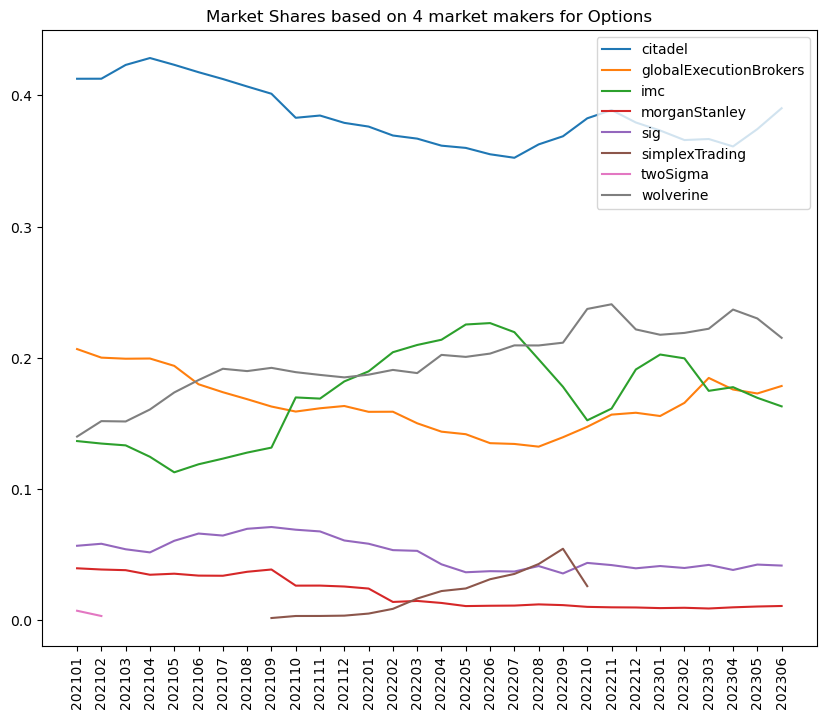

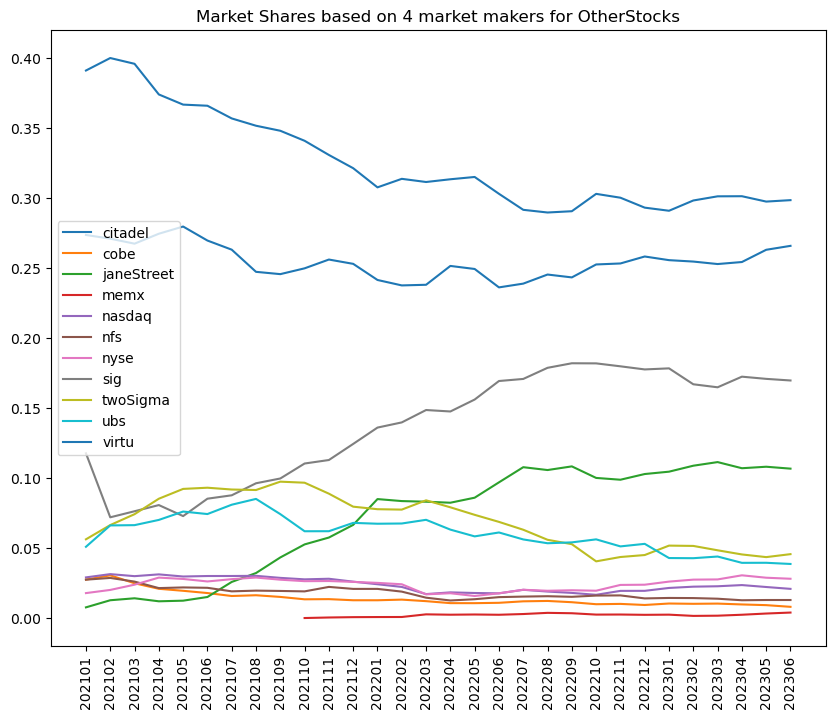

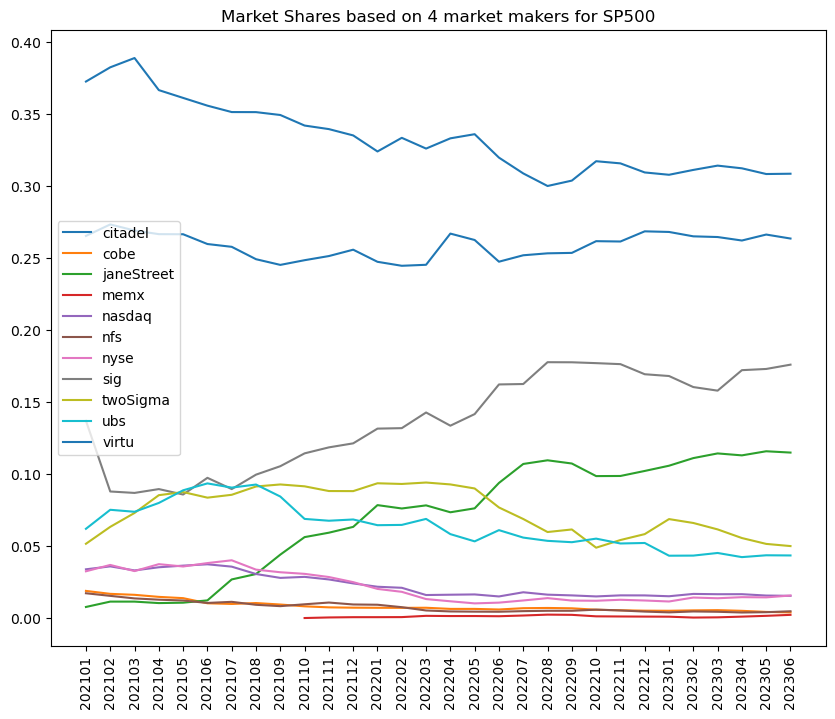

In [163]:
for category, group in monthlyVenueSharesRatio.groupby(["category"]):
    plt.figure(figsize=(10,8))
    for venue, subgroup in group.groupby(["venue"]):
        #print(subgroup)
        plt.plot(subgroup.index.get_level_values(1).astype(str),subgroup,label = venue[0])
    plt.legend()
    plt.title("Market Shares based on 4 market makers for {}".format(category[0]))
    plt.xticks(rotation = 90)
    plt.show()

### Q5. 605 report has a lot of data about execution quality. For simplicity, let us come with a single or few numbers to characterize overall execution quality of each market maker and each broker. Most important single number is probably overall EQ of market and marketable orders in all 4 reported size buckets. We should do it separately for SP500 and non-SP500 stocks (606 report has routing data for SP500 separately, so we should compute execution quality separately too) 